In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Анализ новостных сообщений

In [2]:
import pandas as pd

df = pd.read_csv('../data/lenta-ru-news_2018.csv', usecols = ['title', 'text', 'topic', 'tags'])
df.dropna(subset=['tags', 'topic'], inplace = True)

In [3]:
df['topic'].value_counts()

Мир                  5875
Россия               5697
Спорт                4206
Экономика            4013
Интернет и СМИ       3294
Из жизни             2947
Наука и техника      2943
Бывший СССР          2768
Культура             2643
Силовые структуры    2130
Дом                  1672
Ценности             1596
Путешествия          1011
69-я параллель        343
Крым                   89
Культпросвет           30
Бизнес                 11
Name: topic, dtype: int64

In [4]:
df['tags'].value_counts()

Политика                4922
Общество                3756
Футбол                  2463
Происшествия            2364
Украина                 2149
Госэкономика            2122
Интернет                1781
Следствие и суд         1221
Кино                    1206
Квартира                1180
Музыка                  1068
Люди                    1038
Оружие                  1008
Звери                    741
Бизнес                   710
Регионы                  677
Наука                    673
Зимние виды              650
Конфликты                640
Бокс и ММА               598
Космос                   584
ТВ и радио               564
Явления                  547
Стиль                    480
Рынки                    461
Деловой климат           456
Преступность             448
События                  412
Полиция и спецслужбы     404
Coцсети                  399
                        ... 
Театр                    137
Офис                     119
Мнения                   116
Преступная Рос

In [5]:
sample = df[df['tags'] == 'Кино']
print(len(sample))

1206


In [6]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


sample.text = sample.text.str.lower()
sample.text = sample.text.apply(words_only)

Результат:

In [7]:
sample.text.iloc[0]

'американская актриса сондра локк звезда фильмов с клинтом иствудом и его бывшая возлюбленная скончалась в лос анджелесе об этом сообщает причиной смерти стал сердечный приступ вызванный онкологическими заболеваниями актриса боролась с раком груди и раком костей ей было года локк познакомилась с иствудом в году на съемках вестерна джоси уэйлс человек вне закона артисты закрутили роман после чего начали жить вместе иствуд требовал чтобы локк снималась только в фильмах с его участием она сыграла с возлюбленным в таких лентах как сквозь строй как ни крути проиграешь как только сможешь и внезапный удар пара прожила вместе лет после расставания актриса подала на раздел имущества и отсудила у иствуда миллиона долларов а также трехлетний контракт на съемку фильмов для студии впоследствии она подала в суд на актера еще раз заявив что он саботирует ее работу в студия отказывала ей во всех проектах локк требовала у иствуда миллиона долларов через суд однако затем стороны достигли соглашения сумм

In [8]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
sample.text = sample.text.apply(remove_stopwords)   

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

### Лемматизация

In [9]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

sample.text = sample.text.apply(lemmatize)

CPU times: user 646 ms, sys: 58.9 ms, total: 705 ms
Wall time: 9.44 s


In [10]:
sample.head()

,title,text,topic,tags
90,Умерла отсудившая у Клинта Иствуда миллионы ак...,американский актриса сондра локк звезда фильм ...,Культура,Кино
147,Названы лучшие фильмы года,главный кинокритик журнал тод маккартить выбир...,Культура,Кино
158,Джон Сноу из «Игры престолов» приручил дракона...,сеть появляться шуточный видео который кит хар...,Культура,Кино
214,Подсчитано потраченное россиянами время на про...,житель россия среднее тратить час месяц просмо...,Культура,Кино
276,Трамп принял Кристиана Бэйла за настоящего Бэт...,актер кристиан бэйл сыграть бэтмена супергерой...,Культура,Кино


### Удаление стоп-лемм

In [11]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'год']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

sample.text = sample.text.apply(remove_stoplemmas)   

In [12]:
from collections import Counter

lemmata = []
for index, row in sample.iterrows():
    lemmata += row['text'].split()
cnt = Counter(lemmata)
for i in cnt.most_common(10):
    print(i)

('фильм', 1623)
('актер', 1153)
('сериал', 730)
('актриса', 655)
('режиссер', 645)
('роль', 634)
('сообщать', 607)
('становиться', 581)
('лента', 572)
('картина', 556)


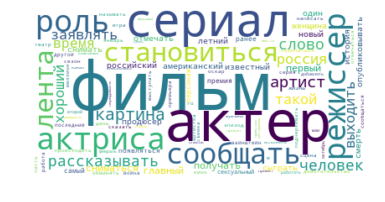

In [13]:
from wordcloud import *
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS по-сложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные методы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* RAKE [Rose et al., 2010]
* Синтаксические шаблоны


### Морфологические шаблоны

Можно использовать парсер  Yargy. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

Переезжаем из DataFrame в списки:

In [14]:
tokens_by_topic = []
for topic in df['topic'].unique():
    if df['topic'].value_counts()[topic] > 100: 
        print(topic)
        tokens = []
        sample = df[df['topic']==topic].sample(n=100)

        sample.text = sample.text.str.lower()
        sample.text = sample.text.apply(words_only)
        sample.text = sample.text.apply(remove_stopwords) 
        sample.text = sample.text.apply(lemmatize)
        sample.text = sample.text.apply(remove_stoplemmas) 
        for i in range(len(sample)):
            tokens += sample.text.iloc[i].split()
        tokens_by_topic.append(tokens)

Россия
Спорт
Путешествия
Мир
Бывший СССР
Интернет и СМИ
Силовые структуры
Экономика
Культура
Дом
Наука и техника
Из жизни
Ценности
69-я параллель


Выберем тему, из текстов про которую будем извлекать ключевые слова:

In [15]:
topic_id = 10
df['topic'].unique()[topic_id]

'Наука и техника'

### Использование мер связности 


$w_1, w_2$ -- два слова

$f(w_1), f(w_2)$ -- их частоты

$f(w_1, w_2)$ -- совместная частота биграммы $w_1 w_2$

$N$ -- число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$, $\texttt{log likelihood}$

Извлекаем биграммы по разным мерам связности:

In [16]:
%%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[topic_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 53.8 ms, sys: 967 µs, total: 54.8 ms
Wall time: 60.3 ms


Результаты:

In [17]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,пресс релиз,вечный мерзлота,пресс релиз,вечный мерзлота,пресс релиз
1,сообщаться пресс,вица премьер,сообщаться пресс,вица премьер,сообщаться пресс
2,такой образ,газовый гигант,такой образ,ушной раковина,такой образ
3,настоящий время,градус цельсий,настоящий время,пресс релиз,черный дыра
4,баллистический ракета,ледяной покров,черный дыра,черный дыра,настоящий время
5,крылатый ракета,укорачивать взлет,крылатый ракета,сообщаться пресс,крылатый ракета
6,сообщать издание,ушной раковина,баллистический ракета,газовый гигант,баллистический ракета
7,черный дыра,медицина физиология,сообщать издание,градус цельсий,лента ру
8,ракетный комплекс,послание федеральный,ракетный комплекс,ледяной покров,противоракетный оборона
9,большой количество,федеральный собрание,лента ру,укорачивать взлет,владимир путин


Похожи ли списки биграм?

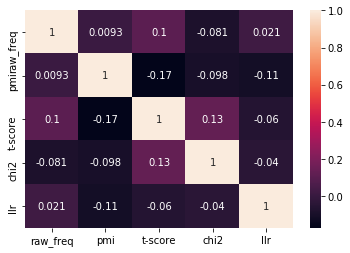

In [18]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

### TextRank

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми. 
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

PageRank: $PR(V_i)=(1-d)+d \times \sum_{V_j \in In(V_i)} \frac{PR(V_j)}{|Out(V_j)|}$

Используем TextRank для извлечения ключевых слов:

In [19]:
%%time
from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[topic_id])
kw = keywords(text)

KeyboardInterrupt: 

Результаты:

In [20]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

NameError: name 'kw' is not defined

## Мера контрастности $tf-idf$



Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.

Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается. 

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking = []
dense = tfidf_matrix.todense()

text = dense[topic_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

Результаты:

In [ ]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

# Векторная модель 

|           | $d_1$      | $d_2$      | $\ldots$ | $d_{D}$    |
|-----------|------------|------------|----------|--------------|
| $w_1$     | $f_{11}$   | $f_{12}$   |          | $f_{1D}$   |
| $w_2$     | $f_{21}$   | $f_{22}$   |          | $f_{2D}$   |
| $\ldots$  |            |            |          |              |
| $w_{|V|}$ | $f_{V1}$ | $f_{V2}$ |          | $f_{VD}$ |


Косинусная мера близости в векторной модели [Salton et. al, 1975]: 
$ \cos(d_i, d_j) = \frac {d_i \times d_j}{||d_i||||d_j||} = \frac{\sum_k f_{ki} \times f_{kj}} {\sqrt{(\sum_k f_{ki})^2} \sqrt{(\sum_k f_{kj})^2}}$


Если вектора нормированы на длину $||d_i|| = ||d_j|| = 1$, $ \cos(d_i, d_j) = d_i \times d_j$

## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [46]:
from gensim.corpora import *
df.sort_values(by = ['topic'], inplace = True)




corpus_sample_train = pd.DataFrame(columns=df.columns)


for cl in df['topic'].unique():
    corpus_sample = df[df['topic']==cl]
    if len(corpus_sample) > 100:
        sample = corpus_sample.iloc[:101,:]
        sample.text = sample.text.str.lower()
        sample.text = sample.text.apply(words_only)
        sample.text = sample.text.apply(remove_stopwords) 
        sample.text = sample.text.apply(lemmatize)
        sample.text = sample.text.apply(remove_stoplemmas) 
        corpus_sample_train = corpus_sample_train.append(sample)


texts = [df.text.iloc[i].split() for i in range(len(corpus_sample_train))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [47]:
%%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

CPU times: user 201 ms, sys: 6.62 ms, total: 207 ms
Wall time: 208 ms


In [48]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

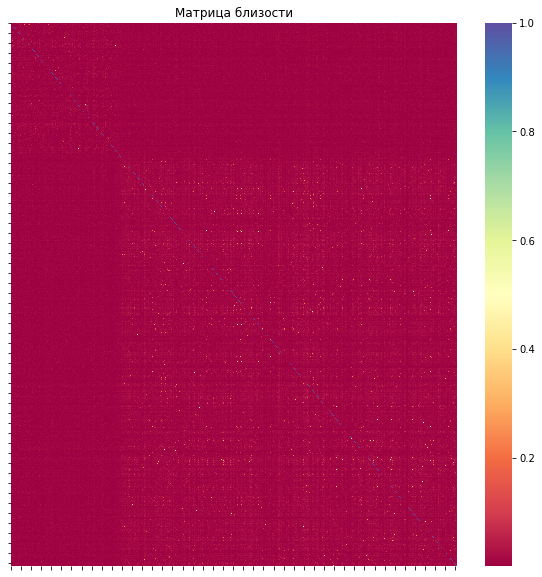

In [49]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

In [34]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

KeyboardInterrupt: 

In [ ]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df['class']})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()